In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("houseprice.csv")

data.shape

(1460, 81)

In [3]:
data.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  

[3 rows x 81 columns]

# Missing Values

In [6]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 1]

# percentage of missing values:
data[vars_with_na].isnull().mean()

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [7]:
def analyse_na_value(df, var):
    df = df.copy()

    # 1 if missing value, 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    df.groupby(var)["SalePrice"].median().plot.bar()
    plt.title(var)
    plt.show()

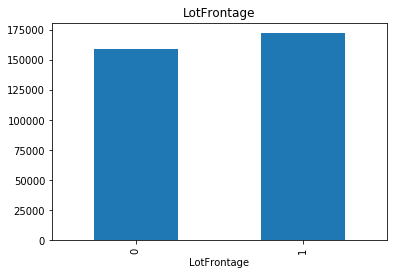

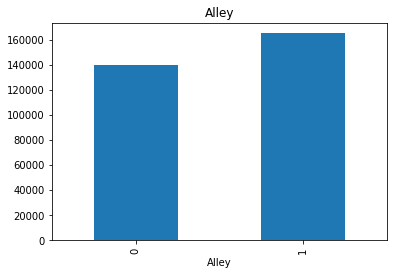

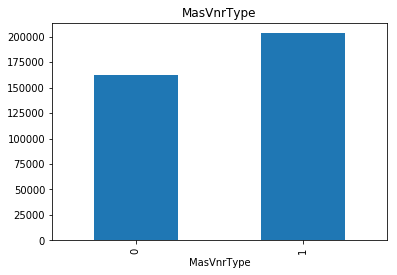

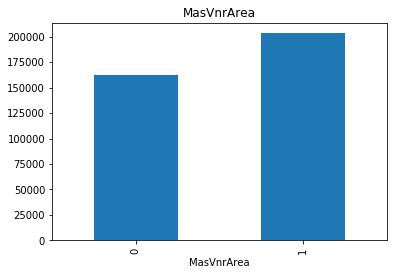

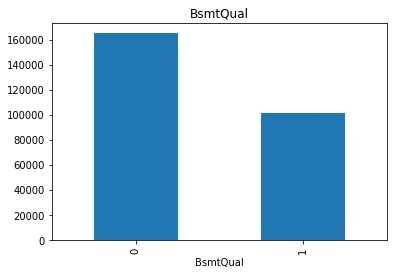

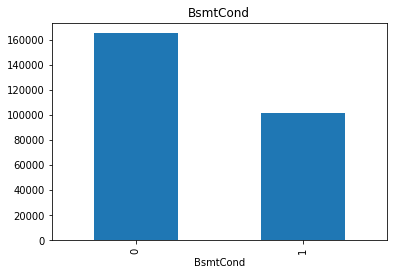

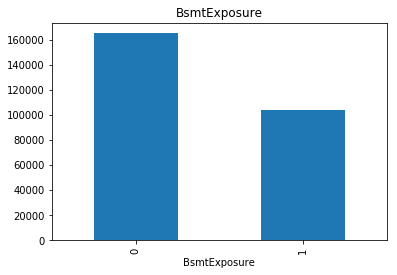

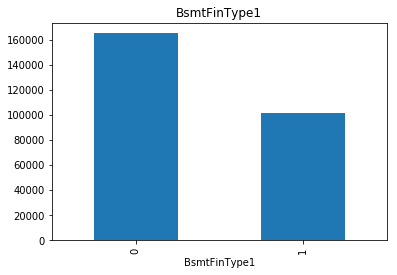

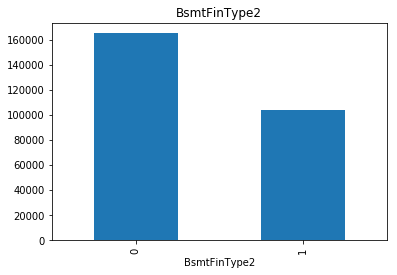

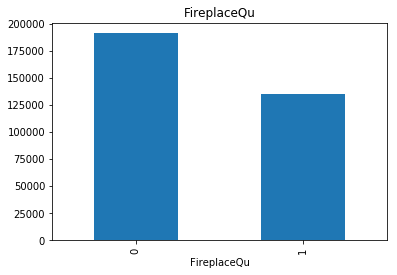

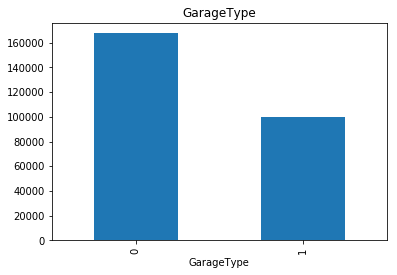

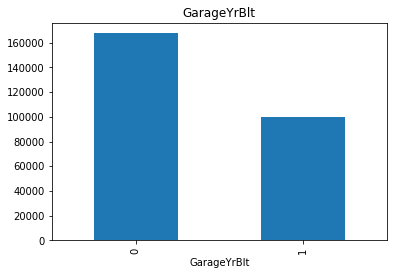

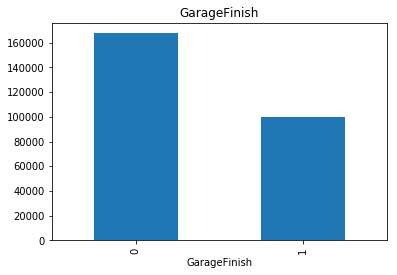

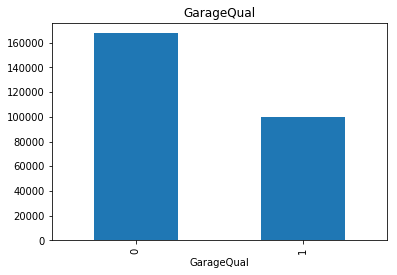

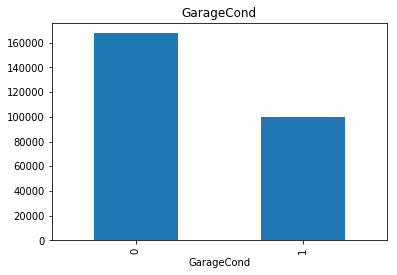

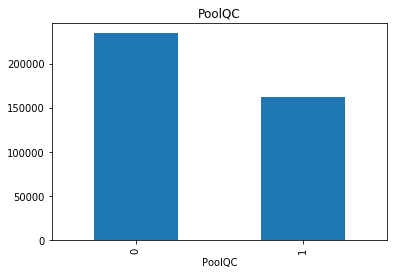

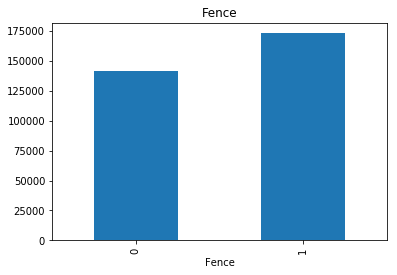

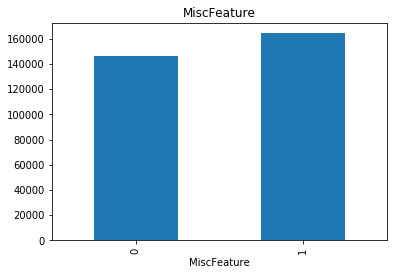

In [8]:
for var in vars_with_na:
    analyse_na_value(data, var)

#### Observation: If a value is missing then the house price is higher.

# Numerical Values

In [9]:
# variables with an type other than object (O)
num_vars = [var for var in data.columns if data[var].dtypes != "O"]

print("Number of numerical variables: {0}".format(len(num_vars)))
print()

data[num_vars].head(3)

Number of numerical variables: 38



Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  

[3 rows x 38 columns]

In [10]:
print("Number of House Id labels: {0}".format(data["Id"].nunique()))
print("Number of Houses: {0}".format(len(data)))

Number of House Id labels: 1460
Number of Houses: 1460


Typically don't use date variables, but extract information, e.g. the difference in years between the year the house was built and the year the house was sold.

In [11]:
years_vars = [var for var in num_vars if "Yr" in var or "Year" in var]

for var in years_vars:
    print(var, data[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

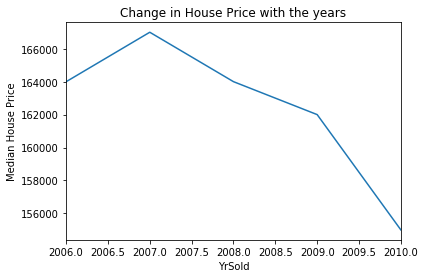

In [12]:
data.groupby("YrSold")["SalePrice"].median().plot()
plt.ylabel("Median House Price")
plt.title("Change in House Price with the years")
plt.show()

In [16]:
def analyse_year_vars(df, var):
    """
    Capture difference between year variable and year
    in which the house was sold
    """
    df = df.copy()

    df[var] = df["YrSold"] - df[var]
    
    plt.scatter(df[var], df["SalePrice"])
    plt.xlabel(var)
    plt.ylabel("SalePrice")
    plt.show()

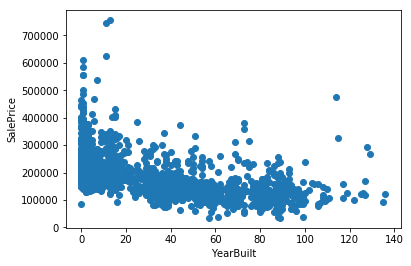

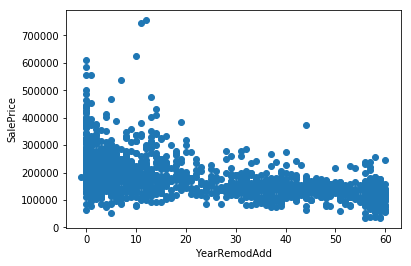

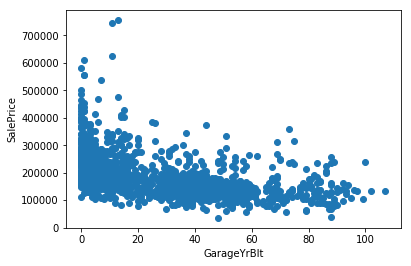

In [17]:
for var in years_vars:
    if var != "YrSold":
        analyse_year_vars(data, var)

# Discrete Variables

In [18]:
discrete_vars = [var for var in num_vars if ((data[var].nunique() < 20) and var not in (years_vars + ["Id"]))]

len(discrete_vars)

14

In [19]:
data[discrete_vars].head(3)

MSSubClass  OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  \
0          60            7            5             1             0         2   
1          20            6            8             0             1         2   
2          60            7            5             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   

   PoolArea  MoSold  
0         0       2  
1         0       5  
2         0       9

In [21]:
def analyse_discrete(df, var):
    df = df.copy()
    
    df.groupby(var)["SalePrice"].median().plot.bar()
    
    plt.title(var)
    plt.ylabel("SalePrice")
    plt.show()

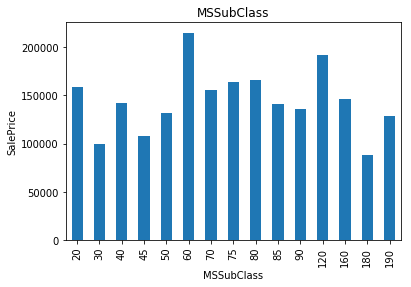

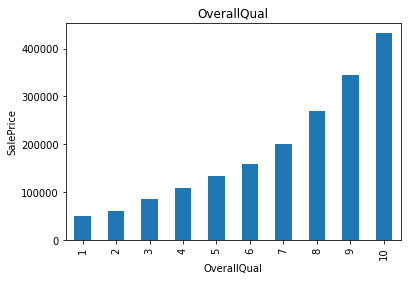

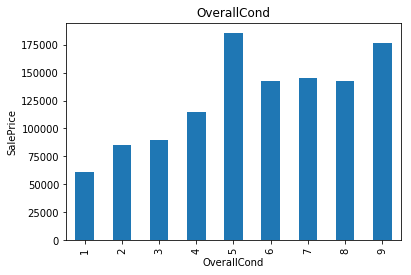

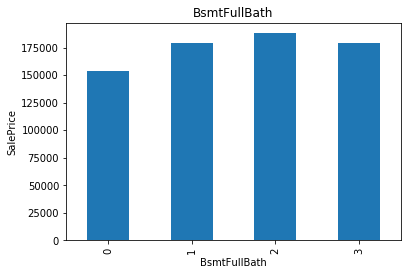

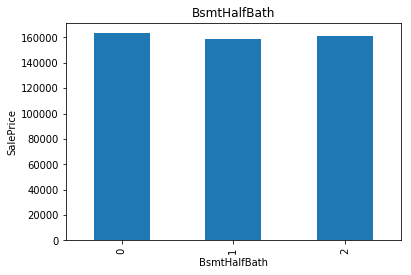

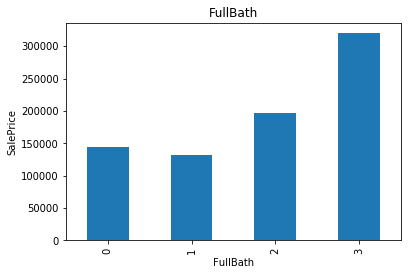

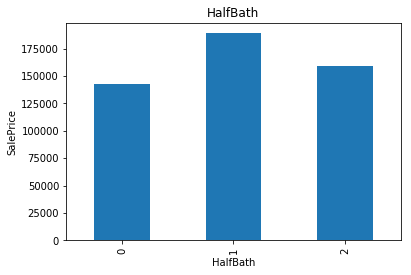

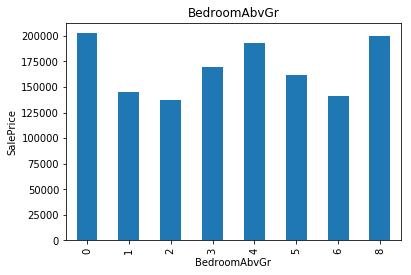

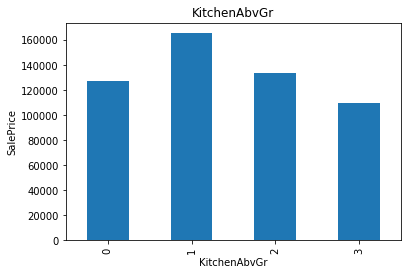

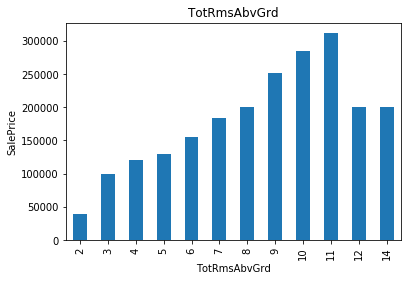

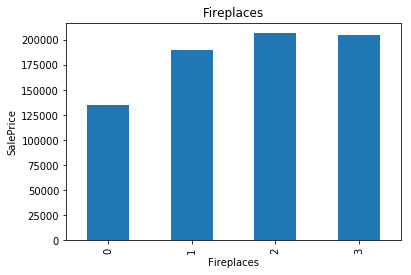

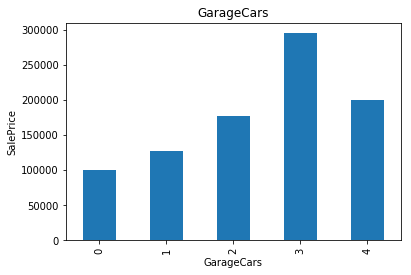

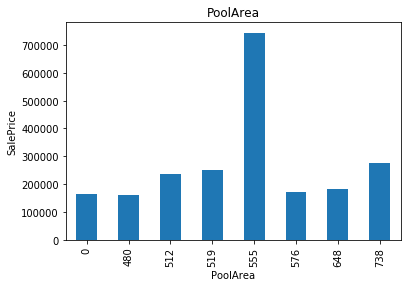

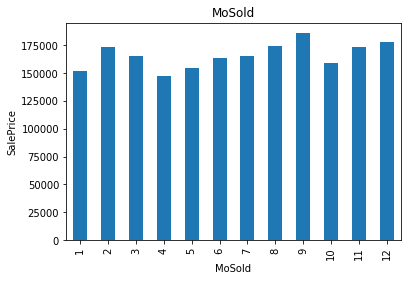

In [22]:
for var in discrete_vars:
    analyse_discrete(data, var)

Observation: the relationship is not always monotonic <br>
Idea: re-arrange the order of the discrete values of a variable to create a monotonic relationship between the variable and the target.

# Continous Variables

In [23]:
contin_vars = [var for var in num_vars if (var not in (discrete_vars + years_vars + ["Id"]))]

len(contin_vars)

19

In [24]:
data[contin_vars].head(3)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MiscVal  \
0           0           61              0          0            0        0   
1         298            0              0          0            0        0   
2           0           42              0          0            0        0   

   SalePrice  
0     208500  
1     181500  
2     223500

In [25]:
def analyse_continous(df, var):
    df = df.copy()
    
    df[var].hist(bins=20)
    plt.ylabel("Number of houses")
    plt.title(var)
    plt.show()

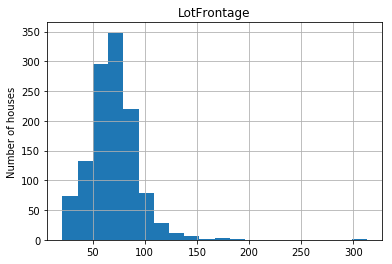

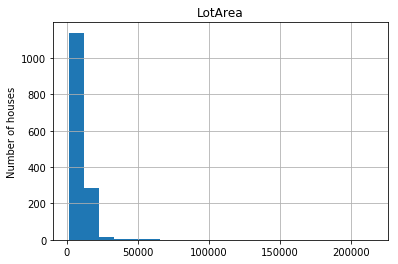

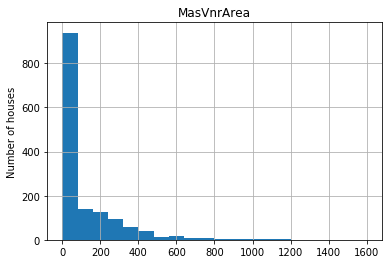

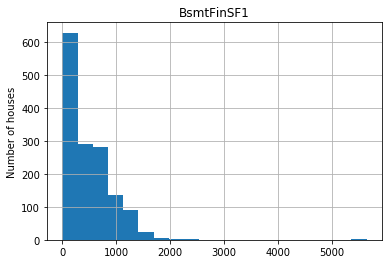

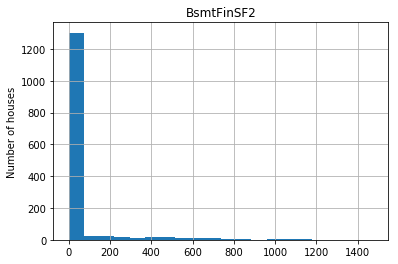

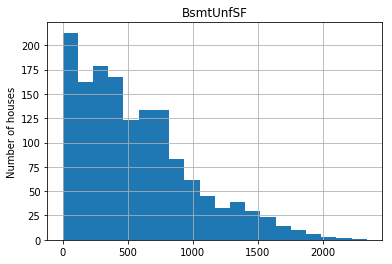

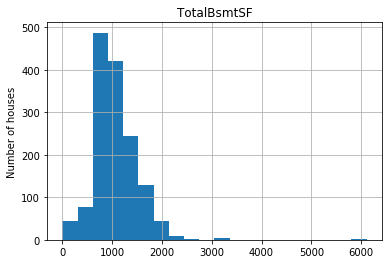

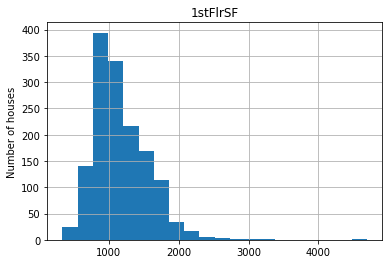

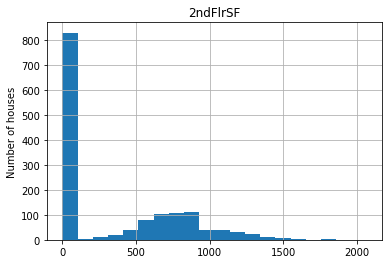

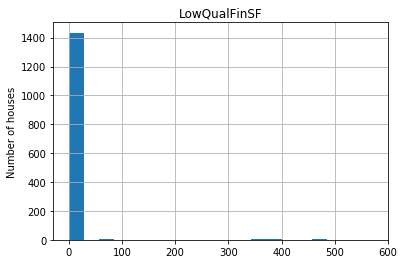

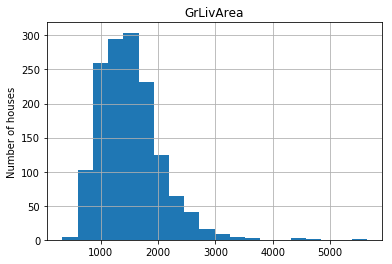

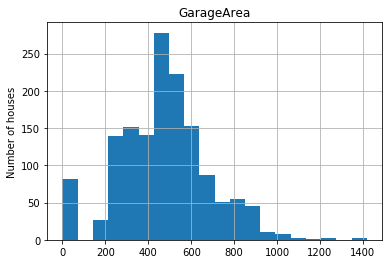

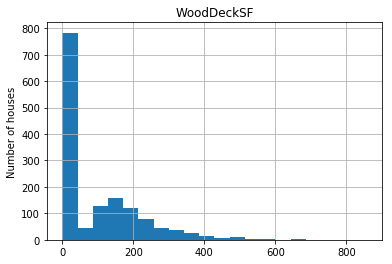

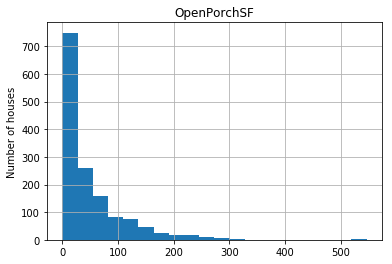

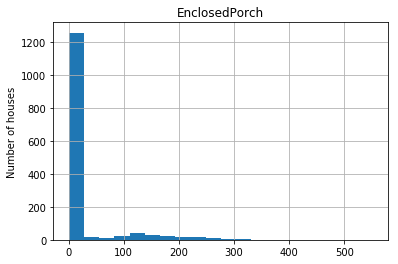

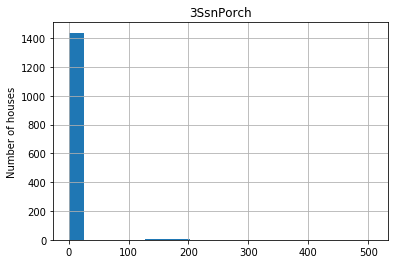

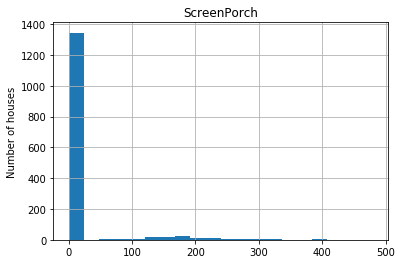

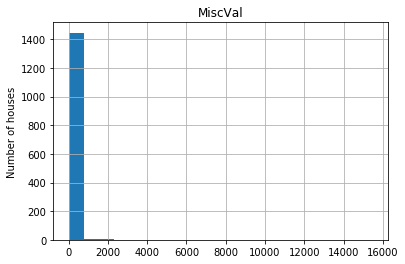

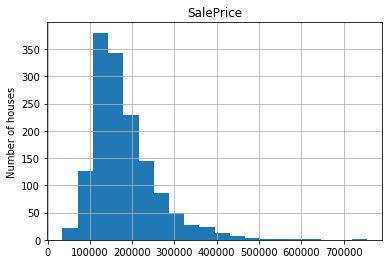

In [26]:
for var in contin_vars:
    analyse_continous(data, var)

Obervation: the above varibales are not normally distributed, including the target SalePrice.
For linear models we need to account for non-gaussion distributions (transform the variables). Try log transformation first.

In [27]:
def analyse_transformed_continous(df, var):
    df = df.copy()
    
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df[var].hist(bins=20)
        plt.ylabel("Number of houses")
        plt.title(var)
        plt.show()

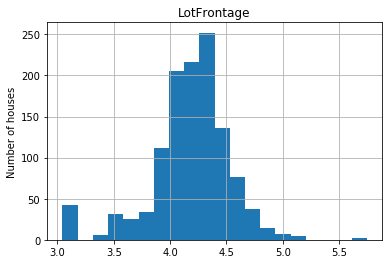

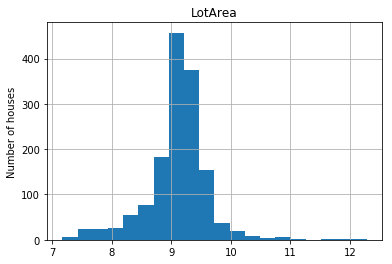

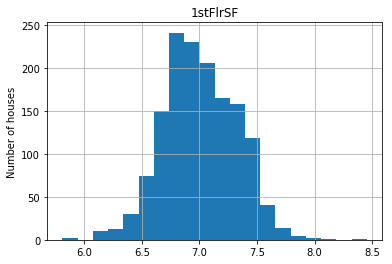

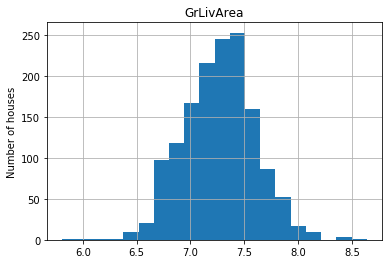

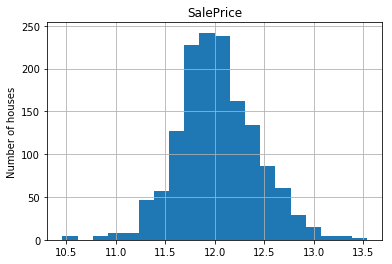

In [28]:
for var in contin_vars:
    analyse_transformed_continous(data, var)

In [29]:
def transform_analyse_continous(df, var):
    df = df.copy()
    
    if 0 in data[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df["SalePrice"] = np.log(df["SalePrice"])
        plt.scatter(df[var], df["SalePrice"])
        plt.xlabel(var)
        plt.ylabel("SalePrice")
        plt.show()

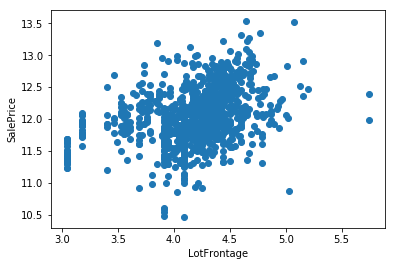

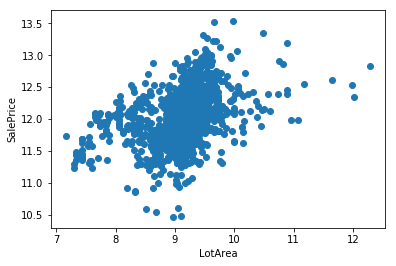

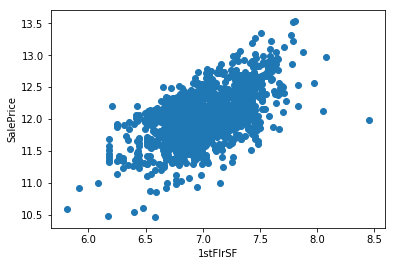

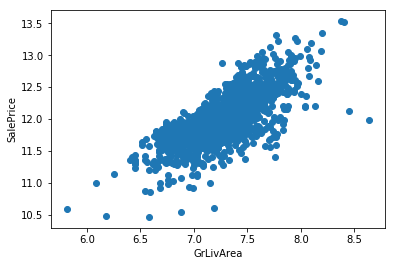

In [30]:
for var in contin_vars:
    if var != "SalePrice":
        transform_analyse_continous(data, var)

From the previous plots, we observe some monotonic associations between SalePrice and the variables to which we applied the log transformation, for example 'GrLivArea'.

# Outliers

In [31]:
def find_outliers(df, var):
    df = df.copy()
    
    if 0 in data[var].unique():
        pass
    else: 
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.ylabel(var)
        plt.title(var)
        plt.show()

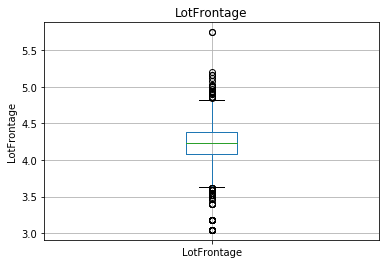

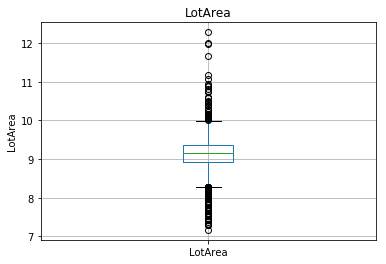

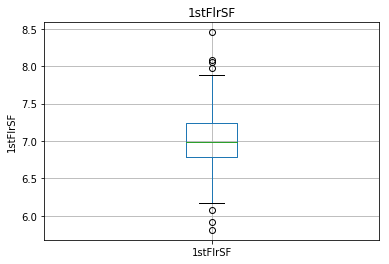

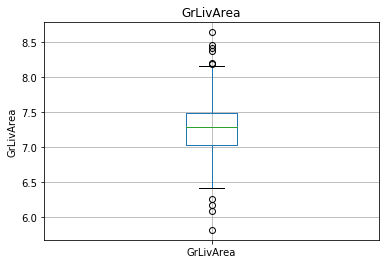

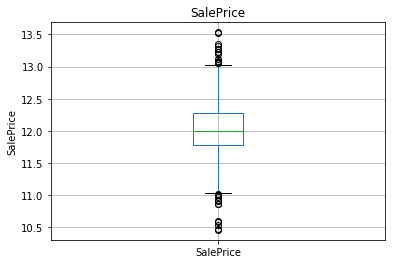

In [32]:
for var in contin_vars:
    find_outliers(data, var)

The majority of the continoues variables seem to contain outliers.
Outliers tend to affect the performance of linear models. Course "Feature Engineering" - best ways how to remove outliers.

# Categorical variables

In [33]:
cat_vars = [var for var in data.columns if data[var].dtypes=="O"]

len(cat_vars)

43

In [34]:
data[cat_vars].head(2)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  

[2 rows x 43 columns]

In [35]:
data[cat_vars].nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.

In [37]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    temp = df.groupby(var)["SalePrice"].count() / len(df)
    
    return temp[temp < rare_perc]

In [38]:
for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Problems with rare labels: They might only appear in the train set or even worse only in the test set.

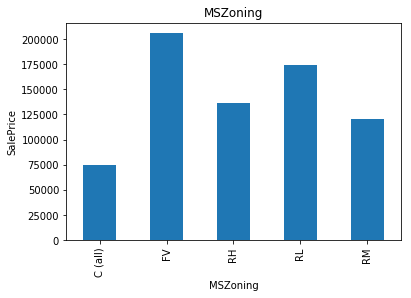

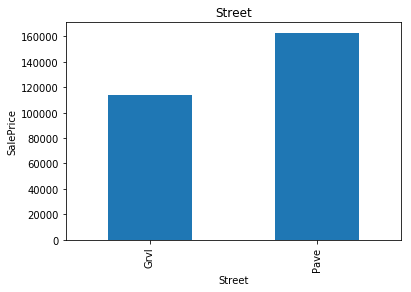

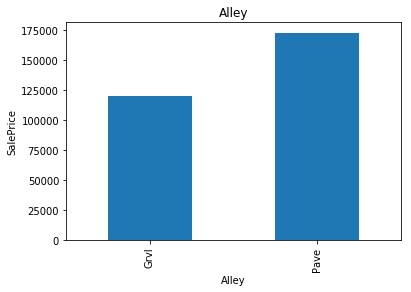

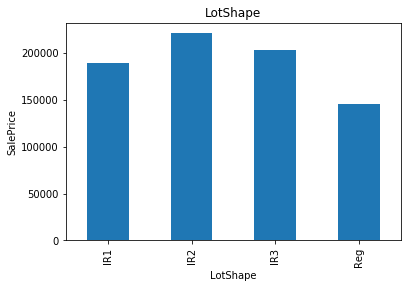

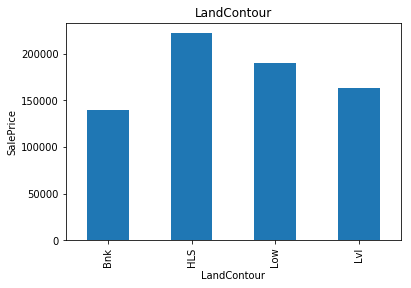

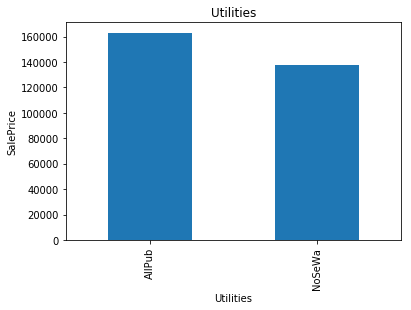

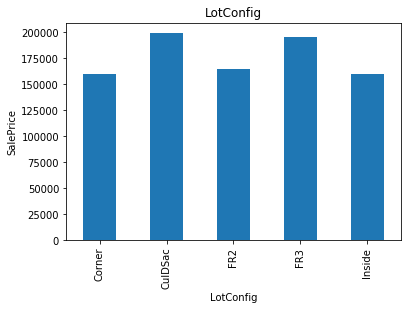

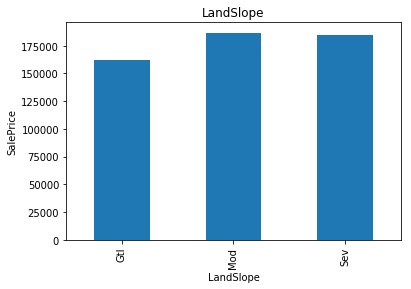

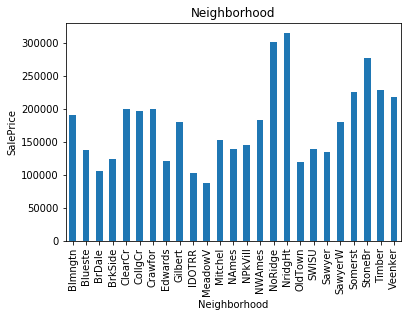

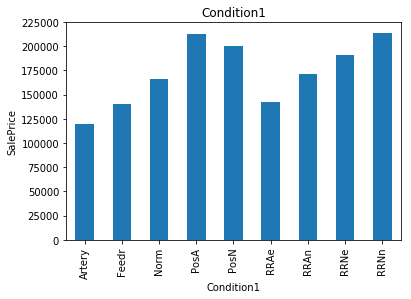

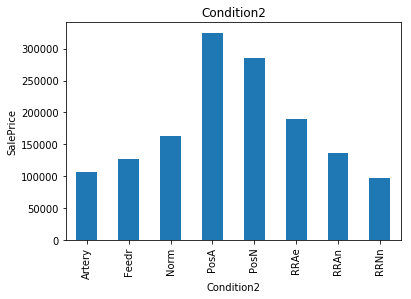

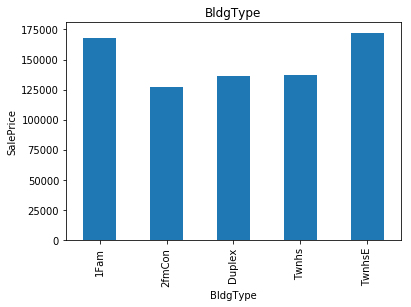

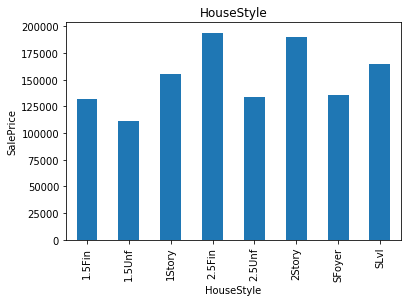

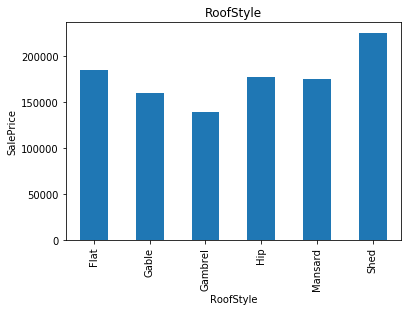

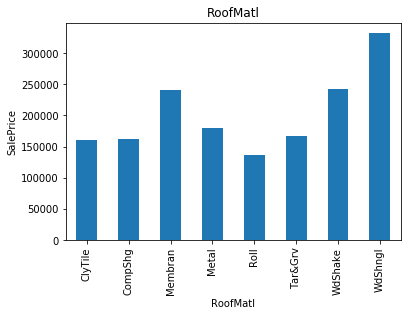

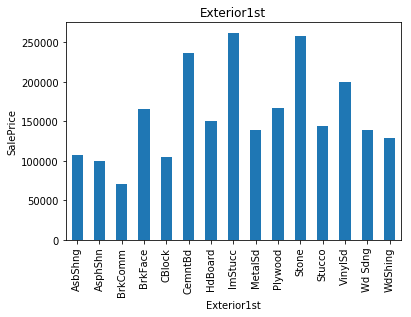

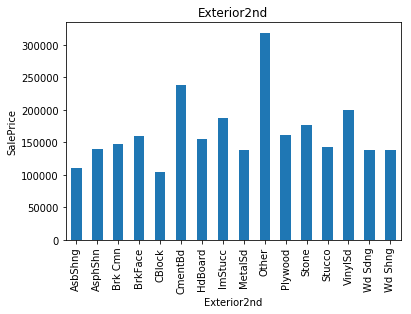

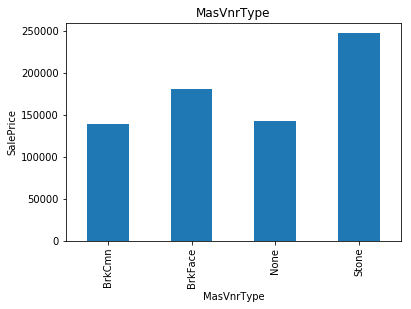

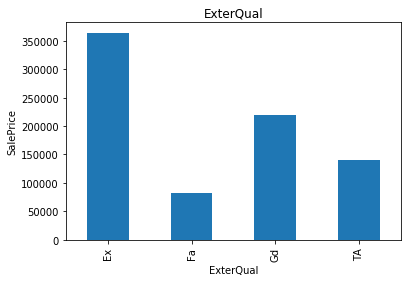

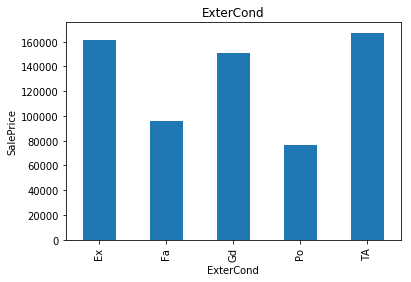

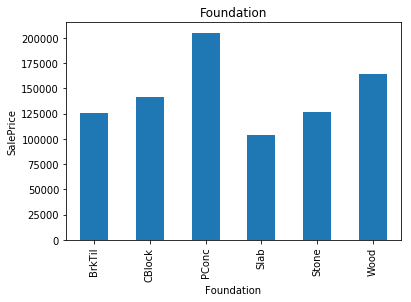

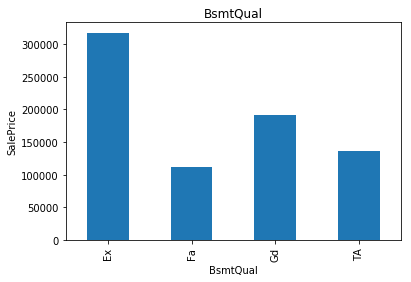

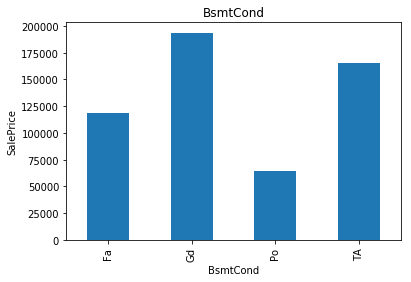

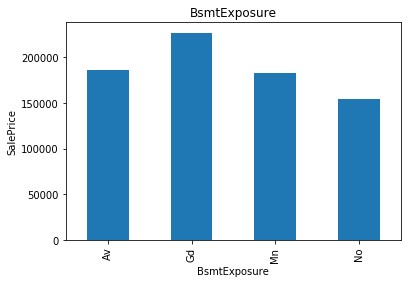

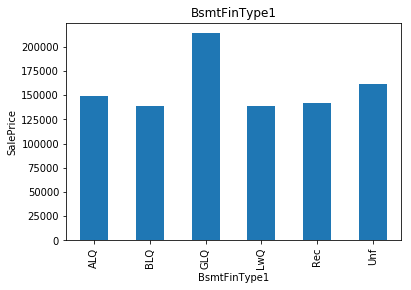

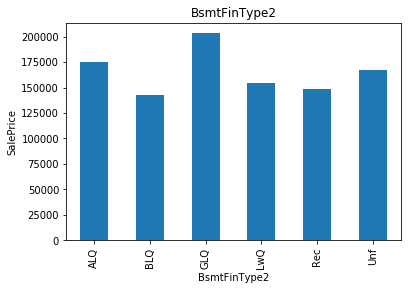

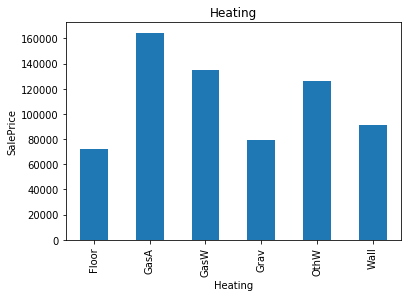

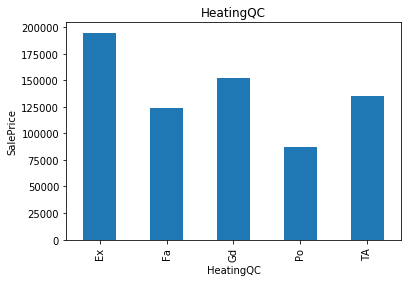

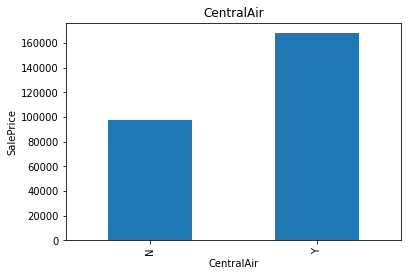

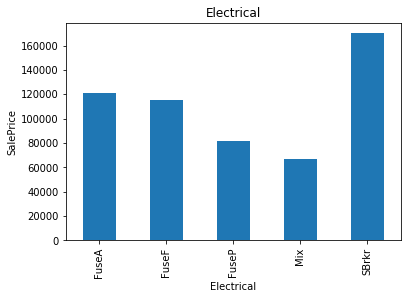

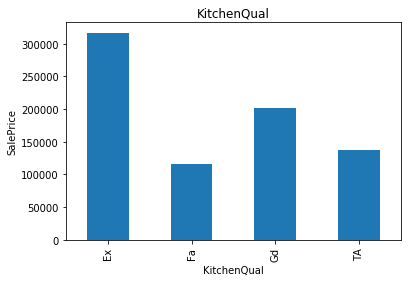

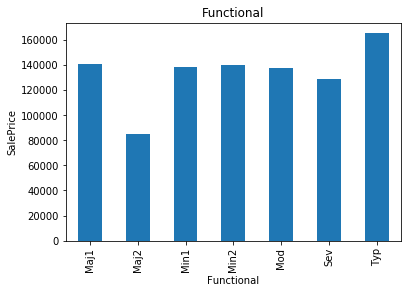

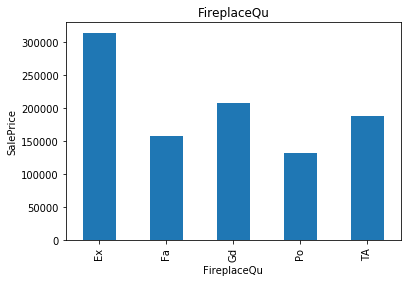

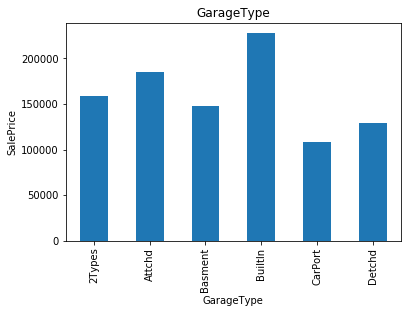

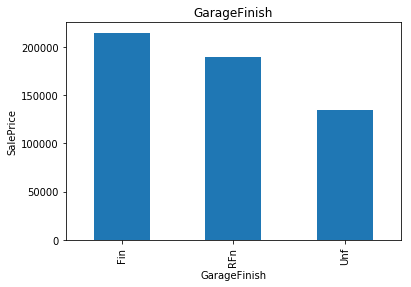

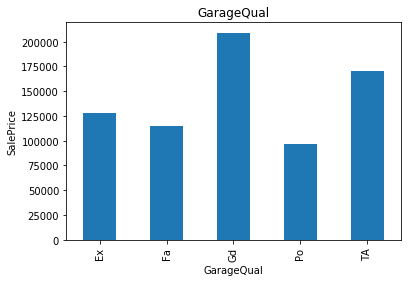

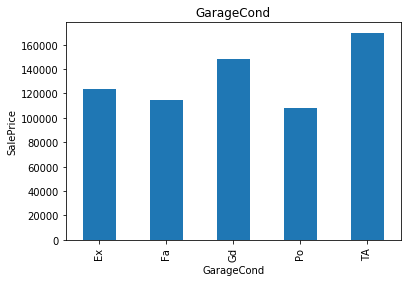

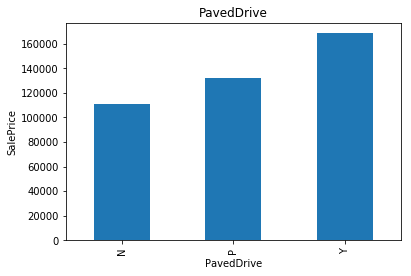

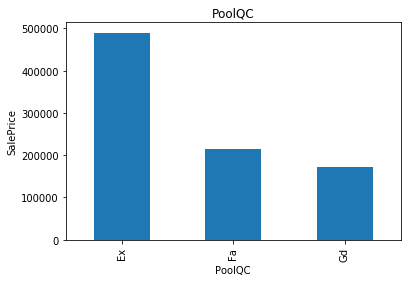

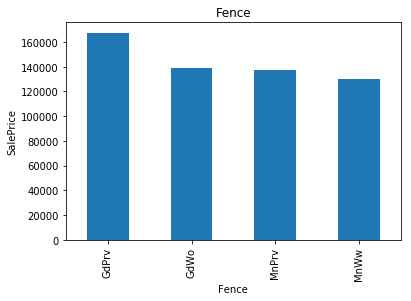

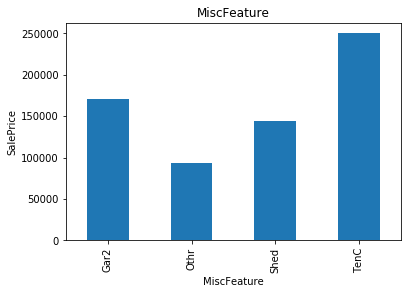

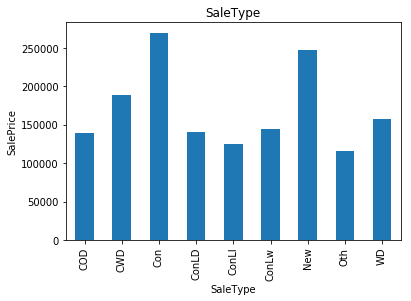

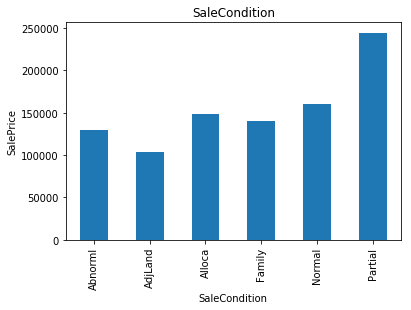

In [44]:
for var in cat_vars:
    analyse_discrete(data, var)